In [1]:
import sys
import numpy as np

from matplotlib import pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import BatchNormalization

from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.optimizers import Adamax
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
# load train and test dataset
def load_dataset():
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
    # one hot encode target values
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    return X_train, Y_train, X_test, Y_test

In [3]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype("float32")
    test_norm = test.astype("float32")
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [4]:
# plot diagnostic learning curves
def summarize_diagnostics_CEL(history):
    # plot loss
    plt.figure(figsize=(10,5))
    plt.title("Cross Entropy Loss")
    plt.plot(history.history["loss"], color = "blue", label = "train")
    plt.plot(history.history["val_loss"], color = "red", label = "test")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(loc = "upper right")
    plt.show()
    
def summarize_diagnostics_ACC(history):
    # plot accuracy
    plt.figure(figsize=(10,5))
    plt.title("Classification Accuracy")
    plt.plot(history.history["accuracy"], color = "blue", label = "train")
    plt.plot(history.history["val_accuracy"], color = "red", label = "test")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(loc = "lower right")
    plt.show()

In [5]:
# run the test harness for evaluating a model
def test_env():
    # load dataset
    X_train, Y_train, X_test, Y_test = load_dataset()
    # prepare pixel data
    X_train, X_test = prep_pixels(X_train, X_test)
    # define model
    model = define_model()
    # fit model
    history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test), verbose=0)
    # evaluate model
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
    print("Test accuracy: {}".format(test_acc))
    print("Test loss: {}".format(test_loss))
    # learning curves
    summarize_diagnostics_CEL(history)
    summarize_diagnostics_ACC(history)

## SGD

In [6]:
# define cnn model
def define_model(init = "he_normal", Pooling = AveragePooling2D, activation = "softplus"):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), strides = (2, 2), kernel_initializer = init, padding= "same", input_shape=(32, 32, 3)))
    
    model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Pooling((2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Conv2D(64, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Pooling((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(64, kernel_initializer = init))
    model.add(Activation(activation))
    model.add(Dropout(0.2))
    
    model.add(Dense(10))
    model.add(Activation("softmax"))
    
    # model summary
    model.summary()
    
    # compile model
    opt = SGD()
    model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])
    return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)         

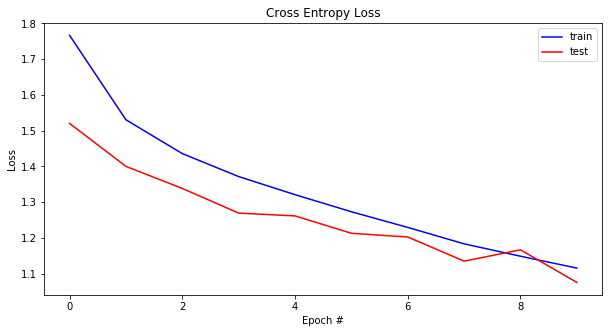

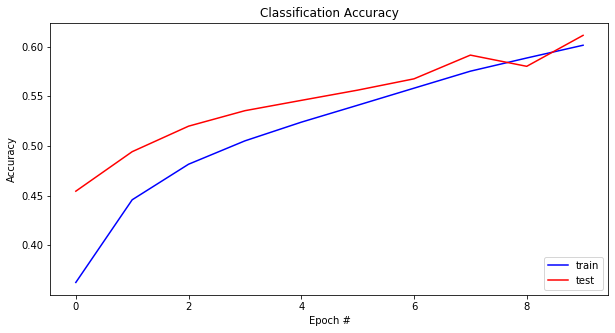

In [7]:
test_env()

## Adam

In [8]:
# define cnn model
def define_model(init = "he_normal", Pooling = AveragePooling2D, activation = "softplus"):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), strides = (2, 2), kernel_initializer = init, padding= "same", input_shape=(32, 32, 3)))
    
    model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Pooling((2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Conv2D(64, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Pooling((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(64, kernel_initializer = init))
    model.add(Activation(activation))
    model.add(Dropout(0.2))
    
    model.add(Dense(10))
    model.add(Activation("softmax"))
    
    # model summary
    model.summary()
    
    # compile model
    opt = Adam()
    model.compile(optimizer=opt, loss = "categorical_crossentropy", metrics=["accuracy"])
    return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_5 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
average_pooling2d_3 (Average (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)         

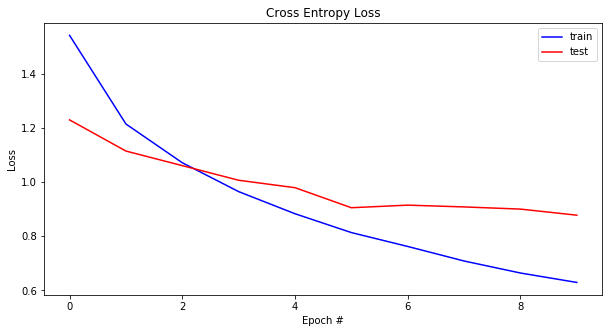

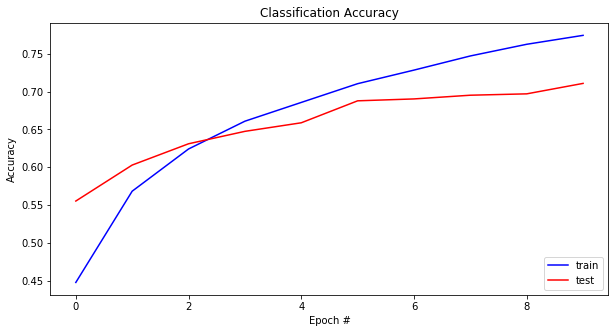

In [9]:
test_env()

## Adagrad

In [10]:
# define cnn model
def define_model(init = "he_normal", Pooling = AveragePooling2D, activation = "softplus"):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), strides = (2, 2), kernel_initializer = init, padding= "same", input_shape=(32, 32, 3)))
    
    model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Pooling((2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Conv2D(64, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Pooling((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(64, kernel_initializer = init))
    model.add(Activation(activation))
    model.add(Dropout(0.2))
    
    model.add(Dense(10))
    model.add(Activation("softmax"))
    
    # model summary
    model.summary()
    
    # compile model
    opt = Adagrad()
    model.compile(optimizer=opt, loss = "categorical_crossentropy", metrics=["accuracy"])
    return model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_9 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
average_pooling2d_5 (Average (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)         

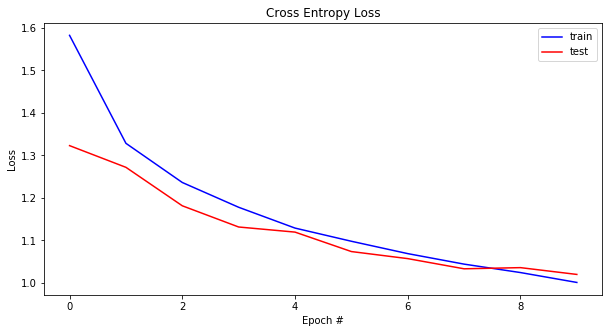

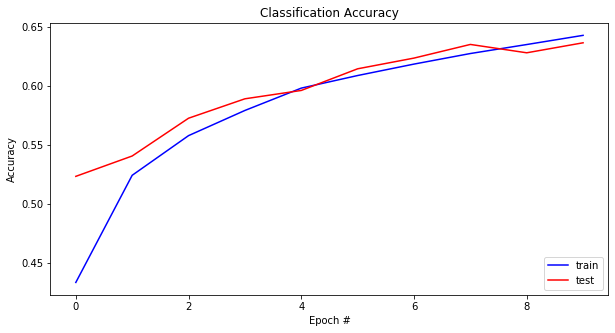

In [11]:
test_env()

## Adamax

In [12]:
# define cnn model
def define_model(init = "he_normal", Pooling = AveragePooling2D, activation = "softplus"):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), strides = (2, 2), kernel_initializer = init, padding= "same", input_shape=(32, 32, 3)))
    
    model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Pooling((2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Conv2D(64, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Pooling((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(64, kernel_initializer = init))
    model.add(Activation(activation))
    model.add(Dropout(0.2))
    
    model.add(Dense(10))
    model.add(Activation("softmax"))
    
    # model summary
    model.summary()
    
    # compile model
    opt = Adamax()
    model.compile(optimizer=opt, loss = "categorical_crossentropy", metrics=["accuracy"])
    return model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_13 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
average_pooling2d_7 (Average (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 64)         

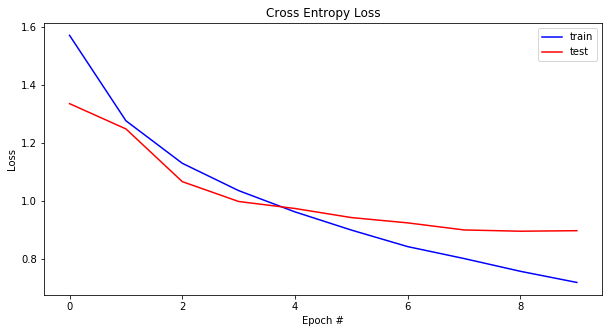

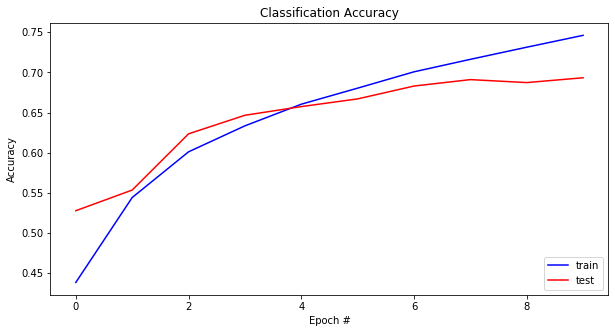

In [13]:
test_env()

## RMSprop

In [14]:
# define cnn model
def define_model(init = "he_normal", Pooling = AveragePooling2D, activation = "softplus"):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), strides = (2, 2), kernel_initializer = init, padding= "same", input_shape=(32, 32, 3)))
    
    model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Pooling((2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Conv2D(64, (3, 3), padding = "same", kernel_initializer = init))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Pooling((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(64, kernel_initializer = init))
    model.add(Activation(activation))
    model.add(Dropout(0.2))
    
    model.add(Dense(10))
    model.add(Activation("softmax"))
    
    # compile model
    opt = RMSprop()
    model.compile(optimizer=opt, loss = "categorical_crossentropy", metrics=["accuracy"])
    return model

Test accuracy: 0.6899999976158142
Test loss: 0.9707601031303406


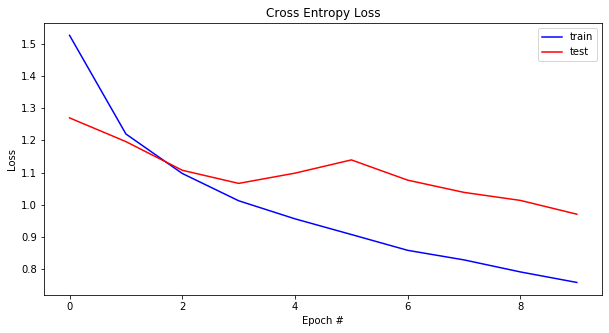

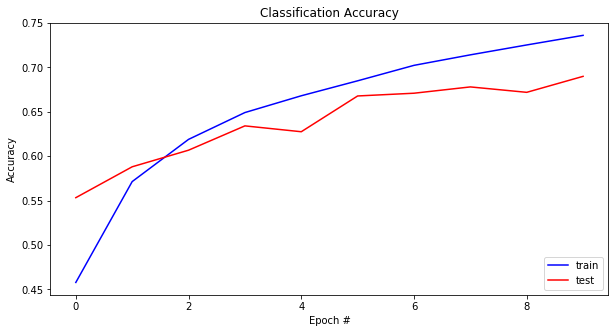

In [15]:
test_env()